In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
import datajoint_utils as du
import datajoint as dj

INFO - 2021-01-27 19:50:19,985 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-27 19:50:19,986 - settings - Setting database.user to celiib
INFO - 2021-01-27 19:50:19,986 - settings - Setting database.password to newceliipass
INFO - 2021-01-27 19:50:19,990 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-27 19:50:19,990 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-27 19:50:20,003 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-27 19:50:20,293 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-27 19:50:20,371 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-27 19:50:20,667 - settings - Setting enable_python_native_blobs to True


# Inspecting Deimation

In [ ]:
# the keysource used
key_source = minnie.NucleiSegmentsRun2 - (minnie.Decimation() & dict(decimation_ratio=decimation_ratio_global)).proj()

In [31]:
len(minnie.NucleiSegmentsRun2())

109690

In [61]:
len(minnie.Decimation() & "decimation_ratio=0.25" & minnie.NucleiSegmentsRun2())

109400

# Inspecting Baylor Soma

In [136]:
len(dj.U("segment_id") & minnie.BaylorSegmentCentroid())

85362

In [95]:
decimation_version = 0
decimation_ratio = 0.25
verts_min = 10000
current_version = 30

key_source =  (((minnie.Decimation & f"n_vertices > {verts_min}").proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}") & (dj.U("segment_id") & minnie.NucleiSegmentsRun2()))


segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691134884748794,0,0.25,2154252,4349933,=BLOB=
864691134884769018,0,0.25,1528011,3078802,=BLOB=
864691134884784122,0,0.25,1687541,3410045,=BLOB=
864691134884789498,0,0.25,2378791,4811962,=BLOB=
864691134884793850,0,0.25,1563430,3169124,=BLOB=
864691134884798714,0,0.25,2671415,5357446,=BLOB=
864691134884800250,0,0.25,2022512,4088911,=BLOB=
864691134884800506,0,0.25,1629673,3307440,=BLOB=
864691134884800762,0,0.25,1575256,3177830,=BLOB=
864691134917386506,0,0.25,1681635,3397410,=BLOB=


In [108]:
segment_id = 864691135771738699

In [109]:
minnie.NeuronGliaNuclei() & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,n_glia_faces The number of faces that were saved off as belonging to glia,glia_faces faces indices that were saved off as belonging to glia (external storage),n_nuclei_faces The number of faces that were saved off as belonging to nuclie,nuclei_faces faces indices that were saved off as belonging to nuclei (external storage)
864691135771738699,0,0.25,30.00,0,=BLOB=,231784,=BLOB=


In [110]:
minnie.BaylorSegmentCentroid()  & dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,volume the volume in billions (10*9 nm^3) of the convex hull,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691135771738699,0,0.25,1,30.00,378551,225986,25159,33394,70403,=BLOB=,1,0.497,2480.2904200989065,1.955,-1.276,7509153.85,603.2075


In [96]:
minnie.Decimation() & key_source & "n_faces>8000000"

segment_id segment id unique within each Segmentation,version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),n_vertices,n_faces,mesh in-place path to the hdf5 (decimated) mesh file
864691134917463050,0,0.25,14422970,29270795,=BLOB=
864691134988488058,0,0.25,4688660,9472233,=BLOB=
864691134988490362,0,0.25,4046544,8241386,=BLOB=
864691135012575222,0,0.25,4440499,8917071,=BLOB=
864691135012932246,0,0.25,4342921,8722740,=BLOB=
864691135065040708,0,0.25,4326197,8777191,=BLOB=
864691135065040964,0,0.25,4989957,10094628,=BLOB=
864691135099884576,0,0.25,4126109,8370357,=BLOB=
864691135113294489,0,0.25,7891081,15899865,=BLOB=
864691135113309081,0,0.25,4773376,9669479,=BLOB=


In [107]:
(curr_table & "key_hash='035e97d66228b147435ed67c87a7f29d'").fetch1("key")

{'segment_id': 864691135771738699,
 'decimation_version': 0,
 'decimation_ratio': Decimal('0.25')}

In [131]:
curr_table = ((schema.jobs & "table_name='__baylor_segment_centroid'"))
curr_table

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__baylor_segment_centroid,0080f26a7f95025101492ba5001276bb,reserved,=BLOB=,,=BLOB=,celiib@10.66.4.64,jr-compute001,1,91507,2021-01-29 01:22:39
__baylor_segment_centroid,02a97c83752fbd2def712a35cac1ad68,reserved,=BLOB=,,=BLOB=,celiib@10.66.4.64,jr-compute001,1,91347,2021-01-29 01:24:20
__baylor_segment_centroid,03d1717e58d5cada6d28233c7cb188dd,error,=BLOB=,"Exception: neuron 628685 did not fix the manifold edges (meshlab script failed) with output:QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root' Current Plugins Dir is: /meshlab/src/distrib/plugins Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files Opening a file with extention off FilterScript Reading filter with name Remove Duplicate Vertices Reading filter with name Smooths normals on a point sets Reading Param with name K : RichInt Reading Param with name useDist : RichBool Reading filter with name Surface Reconstruction: Screened Poisson Reading filter with name Delete Current Mesh Loading Plugins: Total 104 filtering actions Total 1 io plugins Mesh /notebooks/Auto_Proofreading/Preprocessing_Pipeline/Poisson_temp/neuron_628685.off loaded has 11084 vn 21595 fn output mesh /notebooks/Auto_Proofreading/Preprocessing_Pipeline/Poisson_temp/neuron_628685_poisson.off Apply FilterScript: '/notebooks/Auto_Proofreading/Preprocessing_Pipeline/Poisson_temp/poisson_565523.mls' Starting Script of 4 actionsfilter: Remove Duplicate Vertices no additional memory available!!! memory required: 525156 LOG: 2 Removed 0 duplicated vertices Removed 0 duplicated vertices filter: Smooths normals on a point sets no additional memory available!!! memory required: 525156 Removed 0 duplicated vertices filter: Surface Reconstruction: Screened Poisson no additional memory available!!! memory required: 525156 Removed 0 duplicated vertices Problem with filter: Surface Reconstruction: Screened Poisson Failed to apply script file /notebooks/Auto_Proofreading/Preprocessing_Pipeline/Poisson_temp/poisson_565523.mls",=BLOB=,celiib@10.66.4.27,at-compute005,1,91468,2021-01-29 01:15:48
__baylor_segment_centroid,044d13d346aa623d77af03e99282dfd5,error,=BLOB=,DuplicateError: Duplicate entry '4\xC4\xB8z\xE5\xCF\x14\x06\xC5\xA1\x863Z\xF9\xD1\x13' for key 'PRIMARY',=BLOB=,celiib@10.28.0.167,at-node40,1,91296,2021-01-29 01:18:52
__baylor_segment_centroid,04f7ee8ec91a44c2e71851d24e72b148,reserved,=BLOB=,,=BLOB=,celiib@10.66.4.64,jr-compute001,1,91505,2021-01-29 01:17:29
__baylor_segment_centroid,0732de601235daf334bb3d3677eec006,reserved,=BLOB=,,=BLOB=,celiib@10.66.4.27,at-compute005,1,91478,2021-01-29 01:17:09
__baylor_segment_centroid,0813abec7c05eb4e8a8596da9cff6e53,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.172,at-node45,1,91275,2021-01-29 01:17:57
__baylor_segment_centroid,0943c6810bfd9a2692bc9b85e5b1a3bc,error,=BLOB=,"Exception: neuron 764180 did not fix the manifold edges (meshlab script failed) with output:QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root' Current Plugins Dir is: /meshlab/src/distrib/plugins Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript 

# Checking multi-somas

In [9]:
one_soma_segment_ids = (dj.U("segment_id") & (minnie.BaylorSegmentCentroid() & "multiplicity = 1")).fetch("segment_id")
one_soma_segment_ids

array([864691134219060901, 864691134221889045, 864691134242673681, ...,
       864691137196930113, 864691137196930881, 864691137196931137])

In [10]:
n_faces = (minnie.BaylorSegmentCentroid() & "multiplicity = 1").fetch("n_faces")

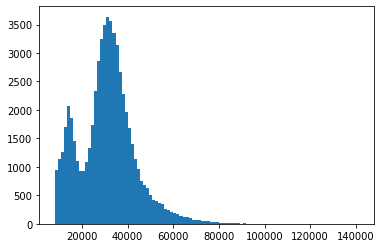

In [11]:
from matplotlib import pyplot as plt
_ = plt.hist(n_faces,bins=100)

In [12]:
 small_soma_ids = (minnie.BaylorSegmentCentroid() & "multiplicity = 1" & "n_faces<20000").fetch("segment_id")

In [17]:
du.plot_decimated_mesh_with_somas(small_soma_ids[-101])

Segment_id = 864691136973686556
vertices = 51052, faces= = 124192
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes_filtered = [<trimesh.Trimesh(vertices.shape=(8937, 3), faces.shape=(17466, 3))>]
other_meshes_to_plot = []


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [18]:
# Doing the bigger somas

big_soma_ids = (minnie.BaylorSegmentCentroid() & "multiplicity = 1" & "n_faces>60000").fetch("segment_id")
big_soma_ids.shape

(1417,)

In [19]:
du.plot_decimated_mesh_with_somas(big_soma_ids[-4])

Segment_id = 864691137019570286
vertices = 1181187, faces= = 2379931
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes_filtered = [<trimesh.Trimesh(vertices.shape=(45159, 3), faces.shape=(88772, 3))>]
other_meshes_to_plot = []


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Inspecting Decomposition

In [20]:
len(minnie.Decomposition())

63685

In [23]:
minnie.Decomposition & "n_somas>4"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135337716198,0,0.25,30.00,0,0,1,=BLOB=,1500171,3046606,0,5,1,5,6,29,496,151,16024610.387575036,4275132.478696027,19397.569,91.616,91.616,405.421,353.134,4033,0.0002516753857009252,8.131048387096774,6973743.135,174,0.0005783120946567528,23.178,529470037470.38824,67223744.61017354,33041.05526839655,75923.36385506809,3042931249.8298173,5977.5805
864691135407316169,0,0.25,30.00,3,0,1,=BLOB=,678754,1384363,0,7,7,4,6,10,146,46,2959888.8342891866,902407.8878080607,5954.267,376.013,330.717,1328.676,1308.017,1103,0.0003726491303396818,7.554794520547945,2173913.308,107,0.0005073799382620091,10.308,316275314132.73517,191074673.94845963,106853.78128692061,145486.62679824542,2955844057.315282,3693.9277
864691135447547973,0,0.25,30.00,0,0,1,=BLOB=,471357,962625,0,5,4,3,6,5,23,9,216943.68459660263,132279.93863738986,7977.041,104.691,104.691,253.687,253.687,9,4.14854205907635e-05,0.391304347826087,28917.339,6,0.0003112319567163493,1.5,302440694.30167115,18731500.935009003,1394.0977118741507,10458.801008684482,50406782.38361186,236.4999
864691135550095602,0,0.25,30.00,0,0,1,=BLOB=,2044741,4077401,0,8,6,4,6,37,647,243,16068099.409069248,6184316.219873339,14559.882,110.278,110.278,453.999,410.34,3575,0.00022249053288668217,5.525502318392581,8273869.886,257,0.0004320831786404044,13.911,479882960890.8239,67650100.0166219,29865.570822891827,57999.819613168125,1867248875.0615716,8491.4921
864691135629829572,0,0.25,30.00,0,0,1,=BLOB=,282433,574816,0,5,3,4,5,10,25,5,223225.87123806073,59300.646788526356,7401.975,138.767,138.767,1180.945,1180.945,16,7.167627977554936e-05,0.64,86001.174,12,0.0001860439719113602,1.333,3495119359.1780224,20924877.675831635,15657.322064836422,40640.367992860454,291259946.59816855,469.1547
864691135839573640,0,0.25,30.00,1,0,1,=BLOB=,155183,318032,0,6,3,4,6,8,15,4,149430.27808407418,65482.322608309056,5382.819,130.898,130.898,262.775,262.77

In [ ]:
np.unique((schema.jobs & "table_name='__decomposition'").fetch("error_message"))

In [ ]:
minnie.Decomposition() & "n_somas > 2"

# Inspecting the Multi-Soma Splitting

In [ ]:
minnie.Decomposition() & minnie.MultiSomaProofread2.proj()

# Deleting all the multi_soma splitting because made refinements

In [27]:
(minnie.Decomposition() & "n_error_limbs>0 OR n_somas>1")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134589113354,0,0.25,30.00,0,0,1,=BLOB=,16959,35490,0,1,1,0,1,1,1,1,6500.555290747829,6500.555290747829,6500.555,81.132,81.132,81.132,81.132,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.4638
864691134651920138,0,0.25,30.00,0,0,1,=BLOB=,11097,23083,0,1,1,0,1,1,3,3,12121.237085842979,12121.237085842979,3524.0,38.678,38.678,89.187,89.187,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5987
864691134668951908,0,0.25,30.00,0,0,1,=BLOB=,10027,21487,0,1,1,0,1,1,3,3,30717.021602829212,30717.021602829212,11655.34,55.344,55.344,99.027,99.027,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.6528
864691134691461988,0,0.25,30.00,0,0,1,=BLOB=,30322,61377,0,1,1,0,1,1,20,20,271693.69158879406,271693.69158879406,12486.756,97.909,97.909,200.711,200.711,6,2.2083692723646103e-05,0.3,92634.578,6,6.477063024996995e-05,1.0,907690952.2834566,65986064.39167149,3340.861346376929,9798.619175265812,151281825.3805761,43.9805
864691134743737238,0,0.25,30.00,0,0,1,=BLOB=,23704,48650,0,2,2,0,1,2,7,4,41164.30323551219,31508.63736225171,5515.413,104.17,104.17,415.659,409.237,4,9.717157064738618e-05,0.5714285714285714,8608.626,2,0.0004646502240891868,2.0,217755544.6000223,24646700.83832677,5289.912071490279,25295.04064876582,108877772.30001114,51.37
864691134765143804,0,0.25,30.00,0,0,1,=BLOB=,44570,90882,0,1,1,1,2,1,1,1,28585.105732166514,28585.105732166514,28585.106,1726.047,1726.047,1726.047,1726.047,4,0.00013993301397863443,4.0,28585.106,1,0.00013993301266750595,4.0,174766472.25666714,13946453.78167041,6113.899801322207,6113.899744036882,174766472.25666714,89.0604
864691134779783067,0,0.25,30.00,0,0,1,=BLOB=,47425,97782,0,3,3,0,1,3,9,3,38744.48466930259,14381.255164244174,4441.31,280.718,280.718,908.041,908.041,12,0.00030972150236153865,1.3333333333333333,36703.012,8,0.000326948643887864,1.5,1637909885.662294,37968327.91082922,42274.65921001181,44626.034660651116,204738735.70

In [26]:
(minnie.DecompositionSplit() & minnie.MultiSomaProofread2.proj())

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,multiplicity the number of somas found for this base segment,n_splits the number of cuts required to help split the neuron,split_success the successfulness of the splitting,n_limbs_cancelled the number of limbs cancelled out in order to split the soma because no split found,split_results will store the results of how to split the limbs of neuron objects from original neuron,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135012571126,0,0.25,30.00,4,0,0,1,5,0,0,=BLOB=,=BLOB=,1348599,2689022,0,0,0,0,1,74765,1449,14,435,190,14910365.03818062,5950109.147626077,22529.051,137.1,137.1,470.083,406.326,5227,0.00035056150447124163,12.016091954022988,8981351.886,226,0.0005819836552833177,23.128,1159462243643.26,149668201.31683445,77762.16347985125,129096.62803108881,5130363909.925929,910.8757
864691135065018692,0,0.25,30.00,4,0,0,2,4,0,1,=BLOB=,=BLOB=,388437,773423,0,0,0,0,1,69644,1646,11,80,38,4527202.909447395,2065744.7931319945,22697.515,302.88,289.255,554.788,552.349,887,0.00019592671628413272,11.0875,3352407.664,51,0.00026458595997291574,17.392,151324440809.7807,134603886.40000883,33425.5927636899,45139.03318942559,2967145898.230994,481.7516
864691135065018692,0,0.25,30.00,4,0,1,2,4,0,2,=BLOB=,=BLOB=,159885,316996,0,0,0,0,1,24151,457,6,106,51,2742664.7109366516,1239338.5659321288,15126.855,66.107,66.107,364.93,337.59,147,5.359751026577281e-05,1.3867924528301887,420643.134,31,0.0003494648744225075,4.742,26311036674.4206,92474955.77996317,9593.238491567232,62549.54508402983,848743118.5296968,492.4416
864691135065032772,0,0.25,30.00,4,0,0,3,1,0,0,=BLOB=,=BLOB=,487328,970235,0,0,0,0,1,32515,643,8,87,44,3748900.659813288,2016662.7356046063,33716.37,398.083,315.461,539.658,494.357,2449,0.0006532581741234965,28.149425287356323,3687385.25

# Inspecting Split Suggestions

In [ ]:
minnie,schema = du.configure_minnie_vm()

In [ ]:
split_table = schema.jobs & "table_name='__neuron_split_suggestions'"
split_table

# Decomposition Explaination

In [ ]:
minnie,schema = du.configure_minnie_vm()

In [ ]:
minnie.Decomposition()

In [ ]:
@schema
class DecompositionVersions(dj.Manual):
    definition="""
    # Descriptions of decomposition vertsion
    process_version          : int unsigned                 # key by which to lookup the decomposition process version
    ---
    description        : varchar(256)                  # new parts of the iteration of the decomposition process
    
    """

In [ ]:
DecompositionVersions()

In [ ]:
explainations_dict = [dict(process_version=0,description="1/15: First version"),
                      dict(process_version=1,description="1/18: Processed all Soma Containing Meshes"),
                      dict(process_version=2,description="1/20: Improved spine extraction"),
                      dict(process_version=3,description="1/20: Improved spine extraction")]
explainations_dict

In [24]:
explainations_dict = [dict(process_version=4,description="1/25: Cleaned all_concept_starting_info")]
minnie.DecompositionVersions.insert(explainations_dict)

In [ ]:
DecompositionVersions